In [3]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [4]:
df = pd.read_csv(r"D:\AegisAI\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# checking the data types, basic information, null values and all.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# checking the value counts for fraud and non-fraud transactions
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
df[df['Class']==1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [6]:
# imbalance analysis
fraud_ratio = df['Class'].value_counts(normalize=True)
print(fraud_ratio)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


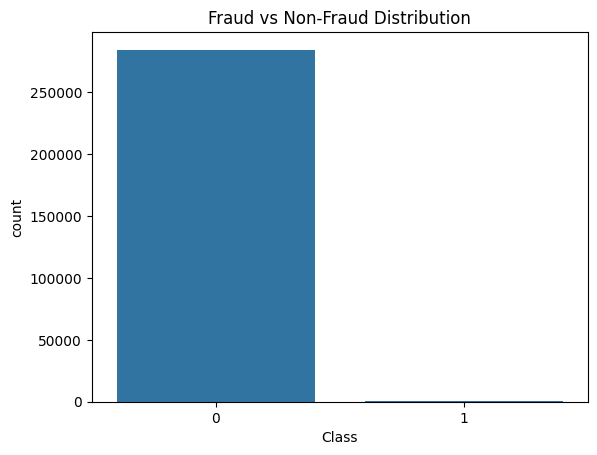

In [7]:
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

### **Output:**
 
1. Dataset is extremely imbalanced.

2. Accuracy is misleading metric.

3. Precision-Recall & ROC-AUC are better.

In [8]:
# Statistical Analysis:

fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

output = list(stats.ttest_ind(fraud['Amount'], non_fraud['Amount']))
print(output)

[np.float64(3.00555231397141), np.float64(0.002651220649191686)]


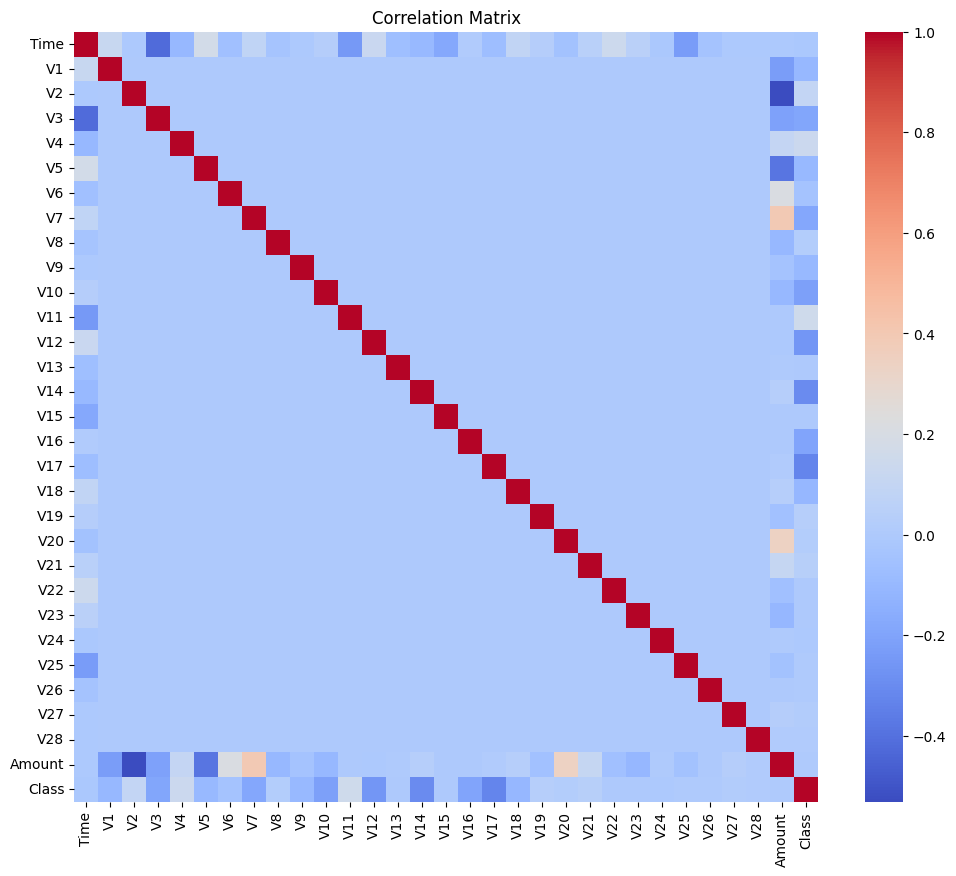

In [9]:
# Correlation Matrix

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

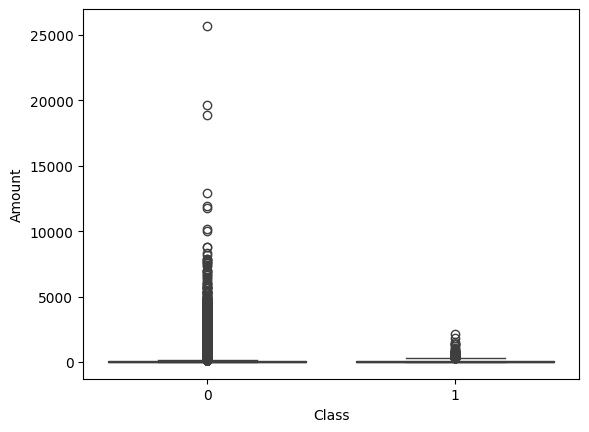

In [10]:
# Outlier Analysis

sns.boxplot(x='Class', y='Amount', data=df)
plt.show()

In [11]:
# data is highly skewed, that's why using log transformation

df['Amount_log'] = np.log1p(df['Amount'])

In [12]:
from sklearn.preprocessing import StandardScaler

<Axes: xlabel='Amount_log', ylabel='Count'>

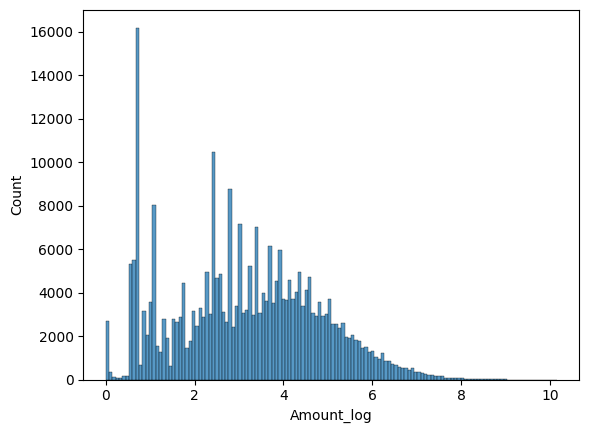

In [13]:
df['Amount'].skew()
sns.histplot(df['Amount_log'])

### **Baseline Model (Logistic Regression)**

In [14]:
# STEP 1 — Train-Test Split (Stratified)


from sklearn.model_selection import train_test_split

X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Train Fraud Ratio:", y_train.mean())
print("Test Fraud Ratio:", y_test.mean())

Train Fraud Ratio: 0.001729245759178389
Test Fraud Ratio: 0.0017204452090867595


In [15]:
# STEP 2 — Log Transform Amount

X_train["Amount"] = np.log1p(X_train["Amount"])
X_test["Amount"] = np.log1p(X_test["Amount"])

In [16]:
# STEP 3 — Scale Only Amount

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train["Amount"] = scaler.fit_transform(X_train[["Amount"]])
X_test["Amount"] = scaler.transform(X_test[["Amount"]])

In [17]:
# STEP 4 — Train Logistic Regression (Class Weighted)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight="balanced", max_iter=1000)
model.fit(X_train, y_train)

c:\Users\kunal\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [18]:
# STEP 5 — Predictions

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [19]:
# STEP 6 — Evaluation Metrics

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    auc
)

print(classification_report(y_test, y_pred))

print("ROC-AUC:", roc_auc_score(y_test, y_prob))

precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

print("PR-AUC:", pr_auc)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

ROC-AUC: 0.9709848345641013
PR-AUC: 0.7466630162580639
Confusion Matrix:
 [[55454  1410]
 [    8    90]]


In [20]:
import numpy as np

threshold = 0.6
y_pred_custom = (y_prob > threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("Threshold:", threshold)
print(classification_report(y_test, y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))

Threshold: 0.6
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.91      0.16        98

    accuracy                           0.98     56962
   macro avg       0.54      0.95      0.58     56962
weighted avg       1.00      0.98      0.99     56962

Confusion Matrix:
 [[55933   931]
 [    9    89]]


In [21]:
import numpy as np

threshold = 0.7
y_pred_custom = (y_prob > threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("Threshold:", threshold)
print(classification_report(y_test, y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))

Threshold: 0.7
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.91      0.22        98

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.61     56962
weighted avg       1.00      0.99      0.99     56962

Confusion Matrix:
 [[56228   636]
 [    9    89]]


In [22]:
import numpy as np

threshold = 0.8
y_pred_custom = (y_prob > threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("Threshold:", threshold)
print(classification_report(y_test, y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))

Threshold: 0.8
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.89      0.27        98

    accuracy                           0.99     56962
   macro avg       0.58      0.94      0.63     56962
weighted avg       1.00      0.99      0.99     56962

Confusion Matrix:
 [[56406   458]
 [   11    87]]


In [23]:
import numpy as np

threshold = 0.9
y_pred_custom = (y_prob > threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("Threshold:", threshold)
print(classification_report(y_test, y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))

Threshold: 0.9


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.25      0.89      0.39        98

    accuracy                           1.00     56962
   macro avg       0.62      0.94      0.69     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56598   266]
 [   11    87]]


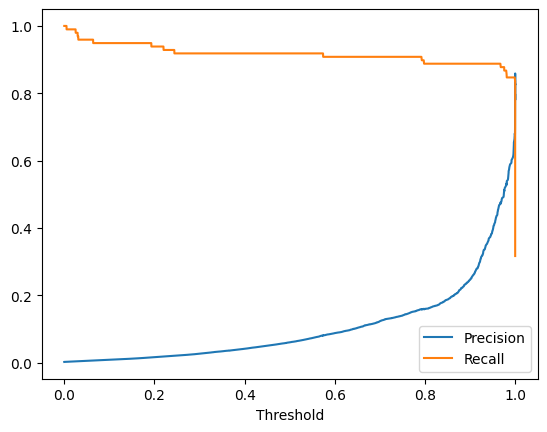

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9522982870694704
Confusion Matrix:
 [[56861     3]
 [   24    74]]


In [26]:
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

threshold = 0.3  # try lower than 0.5
y_pred_custom_rf = (y_prob_rf > threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("Threshold:", threshold)
print(classification_report(y_test, y_pred_custom_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom_rf))

Threshold: 0.3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.83      0.88        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56859     5]
 [   17    81]]


In [27]:
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

threshold = 0.4 # try lower than 0.5
y_pred_custom_rf = (y_prob_rf > threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("Threshold:", threshold)
print(classification_report(y_test, y_pred_custom_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom_rf))

Threshold: 0.4
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.79      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56860     4]
 [   21    77]]


In [28]:
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

threshold = 0.45  # try lower than 0.5
y_pred_custom_rf = (y_prob_rf > threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("Threshold:", threshold)
print(classification_report(y_test, y_pred_custom_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom_rf))

Threshold: 0.45
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.78      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56860     4]
 [   22    76]]


**Install XGBoost**

In [29]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [30]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]),
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.85      0.77        98

    accuracy                           1.00     56962
   macro avg       0.85      0.92      0.89     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9746229456892492
Confusion Matrix:
 [[56830    34]
 [   15    83]]


**Tune threshold for XGBoost.**

In [31]:
threshold = 0.6
y_pred_custom_xgb = (y_prob_xgb > threshold).astype(int)

print("Threshold:", threshold)
print(classification_report(y_test, y_pred_custom_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom_xgb))

Threshold: 0.6
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.84      0.81        98

    accuracy                           1.00     56962
   macro avg       0.89      0.92      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56841    23]
 [   16    82]]


In [32]:
threshold = 0.7
y_pred_custom_xgb = (y_prob_xgb > threshold).astype(int)

print("Threshold:", threshold)
print(classification_report(y_test, y_pred_custom_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom_xgb))

Threshold: 0.7
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.83      0.82        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56846    18]
 [   17    81]]


In [33]:
threshold = 0.8
y_pred_custom_xgb = (y_prob_xgb > threshold).astype(int)

print("Threshold:", threshold)
print(classification_report(y_test, y_pred_custom_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom_xgb))

Threshold: 0.8
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56847    17]
 [   17    81]]


In [34]:
threshold = 0.9
y_pred_custom_xgb = (y_prob_xgb > threshold).astype(int)

print("Threshold:", threshold)
print(classification_report(y_test, y_pred_custom_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom_xgb))

Threshold: 0.9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.80      0.84        98

    accuracy                           1.00     56962
   macro avg       0.94      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56854    10]
 [   20    78]]


In [7]:
df2 = df[df['Class']==1]

In [9]:
df2.to_csv('new.csv')